In [1]:
import cv2 
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("..")

In [4]:
sys.path.append("...")
from utils import list_images, show_image, read_images, add_salt_pepper_noise , add_gaussian_noise

In [5]:
list_images('../data')

['../data\\kodim01.png',
 '../data\\kodim02.png',
 '../data\\kodim03.png',
 '../data\\kodim04.png',
 '../data\\kodim05.png',
 '../data\\kodim06.png',
 '../data\\kodim07.png',
 '../data\\kodim08.png',
 '../data\\kodim09.png',
 '../data\\kodim10.png',
 '../data\\kodim11.png',
 '../data\\kodim12.png',
 '../data\\kodim13.png',
 '../data\\kodim14.png',
 '../data\\kodim15.png',
 '../data\\kodim16.png',
 '../data\\kodim17.png',
 '../data\\kodim18.png',
 '../data\\kodim19.png',
 '../data\\kodim20.png',
 '../data\\kodim21.png',
 '../data\\kodim22.png',
 '../data\\kodim23.png',
 '../data\\kodim24.png']

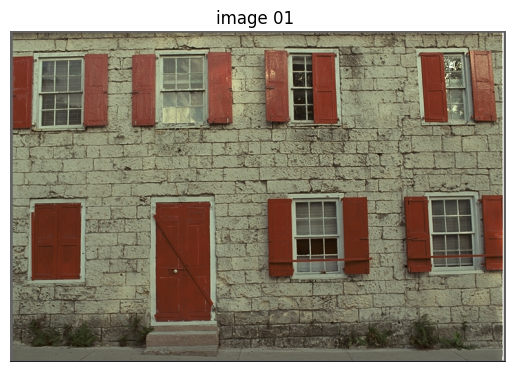

In [6]:
image = read_images('../data/kodim01.png')
show_image(image , 'image 01 ')

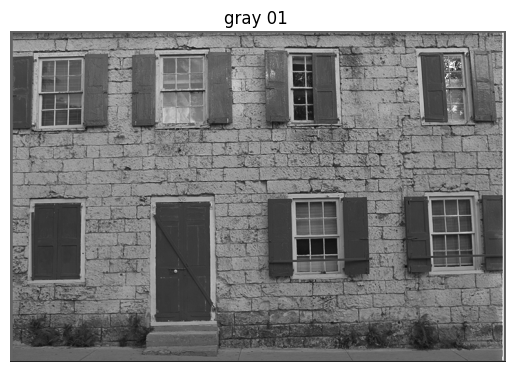

In [7]:
gray = read_images('../data/kodim01.png',gray=True)
show_image(gray , 'gray 01 ')

In [8]:
hist = cv2.calcHist([gray], [0], None, [256], [0,256])

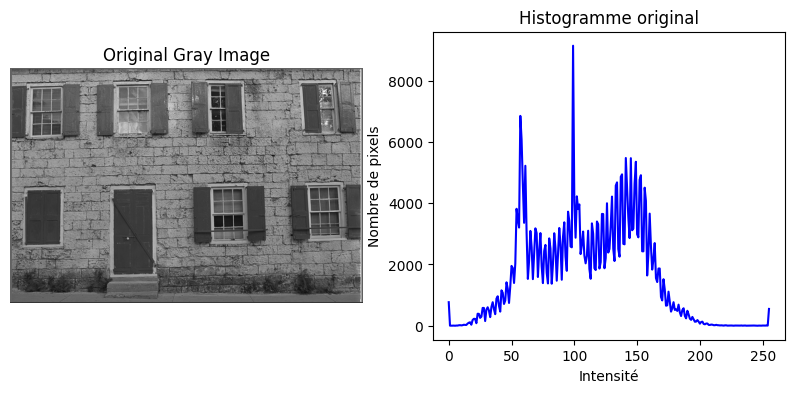

In [9]:
plt.figure(figsize=(10,4))
equalized = cv2.equalizeHist(gray)
hist_eq = cv2.calcHist([equalized], channels=[0], mask=None, histSize=[256],ranges= [0,256])

# Affichage de l'image originale gray
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')
plt.savefig("../results/processed/filtered/image01/gray_image.png", dpi=300, bbox_inches='tight')


plt.subplot(1,2,2)
plt.plot(hist, color='blue')
plt.title("Histogramme original")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.savefig("../results/histograms/image01/Histogramme_original.png", dpi=300, bbox_inches='tight')
plt.show()

In [10]:
equalized = cv2.equalizeHist(gray)
hist_eq = cv2.calcHist([equalized], channels=[0], mask=None, histSize=[256],ranges= [0,256])

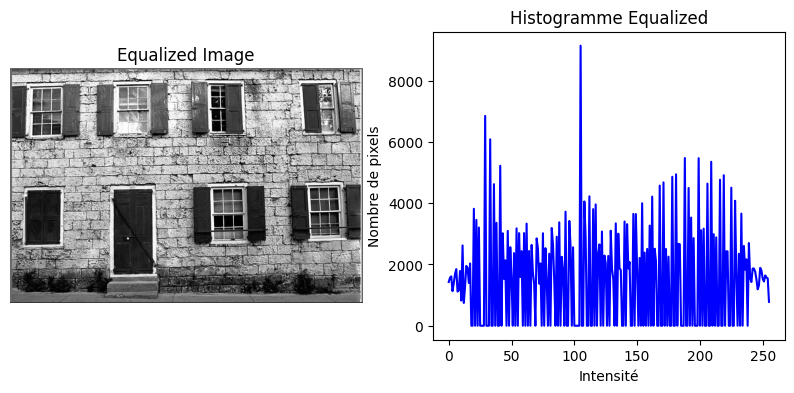

In [12]:
plt.figure(figsize=(10,4))

# Affichage de l'image originale gray
plt.subplot(1,2,1)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.savefig("../results/processed/filtered/image01/Equalized_Image.png", dpi=300, bbox_inches='tight')


plt.subplot(1,2,2)
plt.plot(hist_eq, color='blue')
plt.title("Histogramme Equalized")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.savefig("../results/histograms/image01/Histogramme_Equalized.png", dpi=300, bbox_inches='tight')

plt.show()


In [13]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)
hist_clahe = cv2.calcHist([clahe_img], [0], None, [256], [0,256])

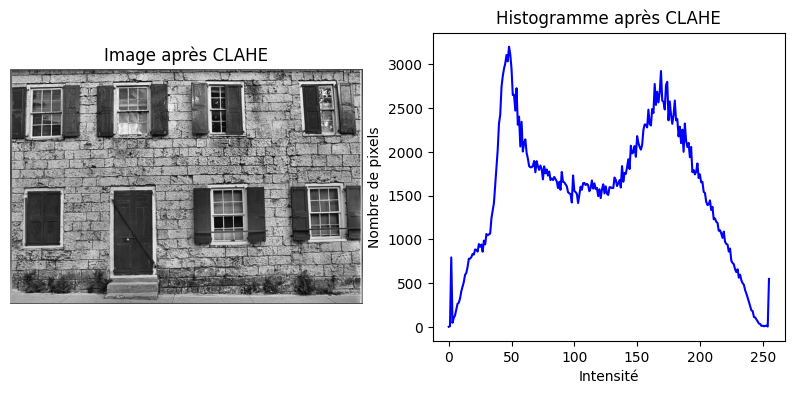

In [15]:
 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)
plt.figure(figsize=(10,4))

# Image CLAHE
plt.subplot(1,2,1)
plt.imshow(clahe_img, cmap='gray')
plt.title("Image après CLAHE")
plt.axis('off')
plt.savefig("../results/processed/filtered/image01/CLAHE_image.png", dpi=300, bbox_inches='tight')

# Histogramme CLAHE
plt.subplot(1,2,2)
plt.plot(hist_clahe, color='blue')
plt.title("Histogramme après CLAHE")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.savefig("../results/histograms/image01/Histogramme_CLAHE.png", dpi=300, bbox_inches='tight')

plt.show()


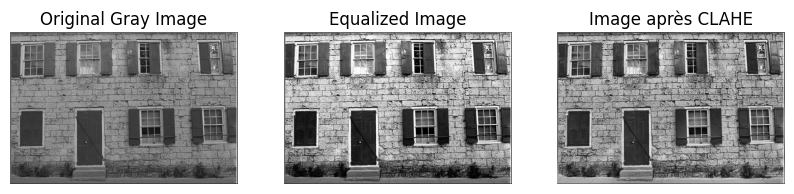

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(clahe_img, cmap='gray')
plt.title("Image après CLAHE")
plt.axis('off')

plt.show()


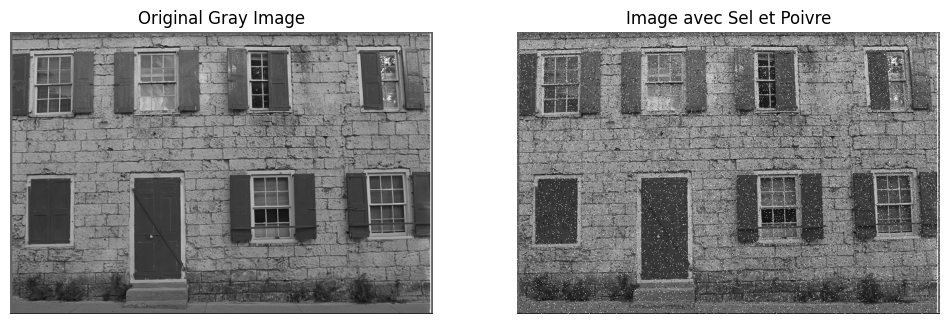

In [17]:
noisy_img_salt_pepper = add_salt_pepper_noise(gray, 0.05)

# --- Affichage ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')



plt.subplot(1,2,2)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image avec Sel et Poivre")
plt.axis('off')


plt.show()

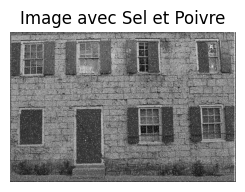

In [18]:
plt.subplot(1,2,2)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image avec Sel et Poivre")
plt.axis('off')
plt.savefig("../results/processed/noisy/image01/Sel_et_Poivre_image.png", dpi=300, bbox_inches='tight')

In [19]:
img_noisy_gauss =add_gaussian_noise(gray, mean=0, sigma=15)

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

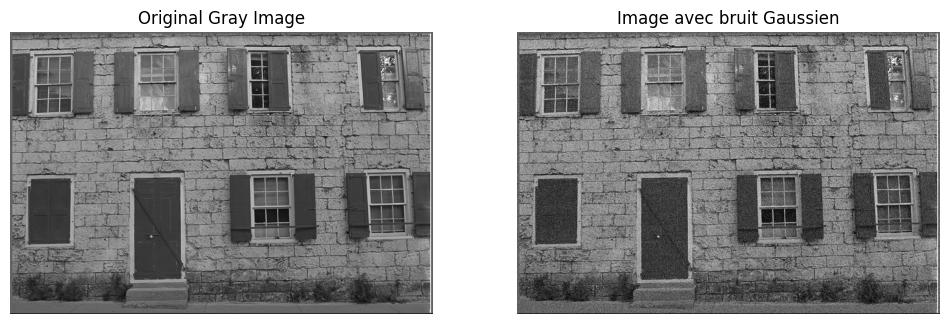

In [20]:
# --- Affichage ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image avec bruit Gaussien")
plt.axis('off')

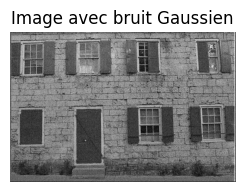

In [21]:
plt.subplot(1,2,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image avec bruit Gaussien")
plt.axis('off')
plt.savefig("../results/processed/noisy/image01/bruit_Gaussien_image.png", dpi=300, bbox_inches='tight')

In [22]:
img_blur_sp=cv2.blur(noisy_img_salt_pepper ,(3,3))
img_blur_gauss=cv2.blur(img_noisy_gauss ,(3,3))

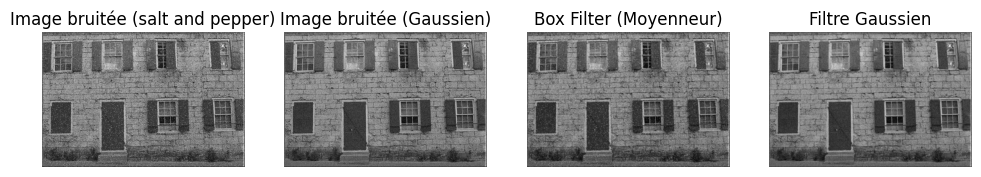

In [23]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(noisy_img_salt_pepper, cmap='gray')
plt.title("Image bruitée (salt and pepper)")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img_noisy_gauss, cmap='gray')
plt.title("Image bruitée (Gaussien)")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_blur_sp, cmap='gray')
plt.title("Box Filter (Moyenneur)")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(img_blur_gauss, cmap='gray')
plt.title("Filtre Gaussien")
plt.axis('off')

plt.show()
